In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 70.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.7/286.7 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 

In [ ]:
seed_value= 123
import tensorflow as tf
import random as rn
import gradio as gr

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


MODEL ARCHITECTURE

<img src="Modelpic.png">

In [ ]:
data =pd.read_csv("/content/drive/MyDrive/Prostate-X/2-Final-with-Ktrans.csv")

In [ ]:
data.head(3)

,ProxID,Name,fid,pos,ijk,SpacingBetweenSlices,VoxelSpacing,Dim,DCMSerDescr,zone,ggg
0,ProstateX-0000,t2_tse_sag0,1,25.7457 31.8707 -38.511,176 169 13,3.6,"0.5625,0.5625,3.6",320x320x19x1,t2_tse_sag,PZ,3
1,ProstateX-0000,ep2d_diff_tra_DYNDISTCALC_BVAL0,1,25.7457 31.8707 -38.511,36 72 9,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDISTCALC_BVAL,PZ,3
2,ProstateX-0000,ktrans,1,25.7457 31.8707 -38.511,56 75 7,NaN,NaN,NaN,ktrans,PZ,3


In [ ]:
data.ggg.value_counts()

2    205
1    180
3    100
4     40
5     35
Name: ggg, dtype: int64

In [ ]:
t2_samples1 = np.load('/content/drive/MyDrive/Prostate-X/Train/numpy/ijk/t2tra/X_train_ijk.npy')
t2_labels1 = np.load('/content/drive/MyDrive/Prostate-X/Train/numpy/ijk/t2tra/Y_train_ijk.npy')

t2_samples2 = np.load('/content/drive/MyDrive/Prostate-X/Train/numpy/ijk/adc/X_train_ijk.npy')
t2_labels2 = np.load('/content/drive/MyDrive/Prostate-X/Train/numpy/ijk/adc/Y_train_ijk.npy')

t2_samples3 = np.load('/content/drive/MyDrive/Prostate-X/Train/numpy/ijk/bval/X_train_ijk.npy')
t2_labels3 = np.load('/content/drive/MyDrive/Prostate-X/Train/numpy/ijk/bval/Y_train_ijk.npy')

In [ ]:
t2_samples1 = np.array(t2_samples1, dtype=np.float32, copy = True)
t2_samples2 = np.array(t2_samples2, dtype=np.float32, copy = True)
t2_samples3 = np.array(t2_samples3, dtype=np.float32, copy = True)

In [ ]:
from sklearn.model_selection import train_test_split
x_t2_train, x_t2_test, y_t2_train, y_t2_test = train_test_split(t2_samples1, t2_labels1, test_size=0.30, random_state=seed_value,shuffle=True, stratify=t2_labels1)
x_adc_train, x_adc_test, y_adc_train, y_adc_test = train_test_split(t2_samples2, t2_labels2, test_size=0.30, random_state=seed_value,shuffle=True, stratify=t2_labels2)

## DATA AUGMENTATION ON TRAIN

In [ ]:
from scipy import ndimage
import random
import warnings
warnings.filterwarnings("ignore")

def aug(data,y):
  num_images, height, width, channels = data.shape

  image1 = image2 = image3 = image4 = image5 = np.empty([num_images, height, width, channels])
  for i in range(num_images):
      T = data[i]
      angles = [80.0, 170, -170.0, -80.0]
      angle = random.choice(angles)
      image1[i] = ndimage.interpolation.rotate(T, angle, mode='nearest', axes=(0, 1), reshape=False) #b-spline interpolation
      angle = random.choice(angles)
      image2[i] = ndimage.interpolation.rotate(T, angle, mode='nearest', axes=(0, 1), reshape=False)
      shear = random.uniform(-0.2, 0.2)
      matrix = np.array([[1, -shear, 0], [0, 1, 0], [0, 0, 1]])
      image3[i] = ndimage.interpolation.affine_transform(T, matrix, mode='nearest')
      angle = random.choice(angles)
      image4[i] = ndimage.interpolation.rotate(T, angle, mode='nearest', axes=(0, 1), reshape=False)
      angle = random.choice(angles)
      image5[i] = ndimage.interpolation.rotate(T, angle, mode='nearest', axes=(0, 1), reshape=False)
  return np.concatenate((x_t2_train,image1, image2,image3,image4,image5), axis=0), np.concatenate((y,y,y,y,y,y), axis=0)

In [ ]:
x_t2_train,y_t2_train = aug(x_t2_train,y_t2_train)
print(x_t2_train.shape,y_t2_train.shape)

(612, 224, 224, 3) (612,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Input
from tensorflow.keras.layers import Reshape, MaxPooling2D,AveragePooling2D
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
optimizer = Adam()

In [ ]:
def leNet():
    model = Sequential()
    model.add(InputLayer(input_shape=(224,224,3)))
    model.add(Conv2D(filters=6, kernel_size=(2, 2), activation='relu'))
    model.add(Conv2D(filters=6, kernel_size=(2, 2), activation='relu'))
    model.add(AveragePooling2D(pool_size=2, strides=1))
    model.add(Conv2D(filters=16, kernel_size=(2, 2), activation='relu'))
    model.add(Conv2D(filters=16, kernel_size=(2, 2), activation='relu'))
    model.add(AveragePooling2D(pool_size=2, strides=1))
    model.add(Flatten())
    model.add(Dense(units=120, activation='relu'))
    model.add(Dense(units=84, activation='relu'))
    model.add(Dense(units=6, activation='sigmoid'))
    model.save_weights('model.h5')
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model
model = leNet()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 223, 223, 6)       78        
                                                                 
 conv2d_1 (Conv2D)           (None, 222, 222, 6)       150       
                                                                 
 average_pooling2d (AverageP  (None, 221, 221, 6)      0         
 ooling2D)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 220, 220, 16)      400       
                                                                 
 conv2d_3 (Conv2D)           (None, 219, 219, 16)      1040      
                                                                 
 average_pooling2d_1 (Averag  (None, 218, 218, 16)     0         
 ePooling2D)                                            

In [ ]:
from keras.utils import to_categorical
train = np.array(x_t2_train)
test = np.array(x_t2_test)
labels_train = np.array(to_categorical(y_t2_train))
labels_test = np.array(to_categorical(y_t2_test))

In [ ]:
from IPython.display import clear_output

In [ ]:
def run_cross_validation(data, labels):
    from sklearn.model_selection import StratifiedKFold
    from sklearn.metrics import f1_score
    data = np.array(data)
    labels = np.array(labels)

    skf = StratifiedKFold(n_splits=5, shuffle=True)
    f1_scores = []
    for j in range(1, 5):
        cv_f1_scores = []
        for i, (train, test) in enumerate(skf.split(data, labels)):
            y_train = to_categorical(labels[train])
            model.load_weights('model.h5')
            model.fit(data[train], y_train, epochs=5, batch_size=16, verbose=0)
            y_pred = np.argmax(model.predict(data[test]), axis=1)
            y_true = labels[test]
            f1 = f1_score(y_true, y_pred, average='weighted')
            cv_f1_scores.append(f1)
            print("Fold {}: F1-score {:.3f}".format(i+1, f1))
        mean_f1 = np.mean(cv_f1_scores)
        std_f1 = np.std(cv_f1_scores)
        print("Iteration {}: Mean F1-score {:.3f}, Std {:.3f}".format(j, mean_f1, std_f1))
        f1_scores.append(mean_f1)
        clear_output()
    mean_f1_scores = np.mean(f1_scores)
    std_f1_scores = np.std(f1_scores)
    print("Experiment Results: Mean F1-score {:.3f}, Std {:.3f}".format(mean_f1_scores, std_f1_scores))
    return mean_f1_scores, std_f1_scores

In [ ]:
print("Cross validation for T2")
t2_score, t2_std =run_cross_validation(t2_samples1, t2_labels1)

Experiment Results: Mean F1-score 0.351, Std 0.010


In [ ]:
from IPython.display import clear_output
def plot_ROC_Curve(model, data_train,labels_train, data_test,labels_test):
    from sklearn.metrics import roc_curve
    from sklearn.metrics import auc
    from sklearn.preprocessing import label_binarize
    auc_values =[]
    train=data_train
    test=data_test
    train = np.array(train)
    test = np.array(test)
    labels_train = np.array(to_categorical(labels_train))
    roc_auc = {0:[], 1: [], 2: [], 3: [], 4: [], 5: []}
    for i in range (5):
        model.load_weights('model.h5')
        model.fit(train, labels_train, epochs=10, batch_size=16, shuffle=True ,verbose=1)
        y_pred_keras = model.predict(test)
        labels_binarized = np.array(to_categorical(labels_test))
        n_classes = labels_binarized.shape[1]
        fpr = dict()
        tpr = dict()
        interp_tpr = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(labels_binarized[:, i], y_pred_keras[:, i])
            interp_fpr = np.linspace(0, 1, 100)
            interp_tpr[i] = np.interp(interp_fpr, fpr[i], tpr[i])
            roc_auc[i].append(auc(interp_fpr, interp_tpr[i]))
        clear_output()
    plt.figure()
    lw = 2
    colors = ['red', 'blue', 'green', 'orange', 'purple','yellow']
    for i, color in zip(range(n_classes), colors):
        plt.plot(interp_fpr, interp_tpr[i], color=color, lw=lw,
                label='ROC curve of class {0}'
                ''.format(i))
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve for multi-class classification')
    plt.legend(loc="lower right")
    plt.show()
    mean_dict = {}
    std_dict = {}
    for key, values in roc_auc.items():
        mean_dict[key] = np.mean(values)
        std_dict[key] = np.std(values)
    print('AUC for each Class (Ignore 0)')
    for key in mean_dict:
        mean = mean_dict[key]
        std = std_dict[key]
        print("{}: {:.4f} (+/-) {:.2f}".format(key, mean, std))

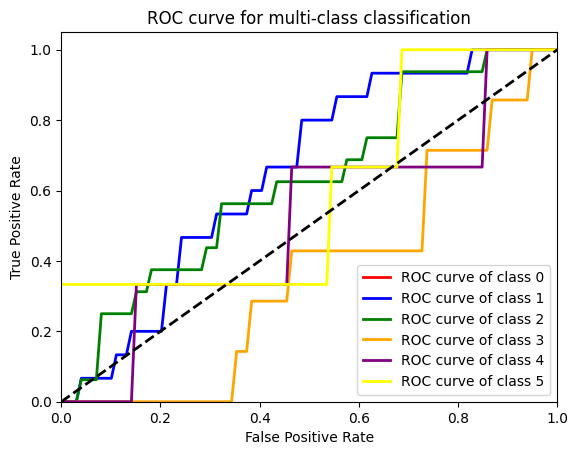

AUC for each Class (Ignore 0)
0: nan (+/-) nan
1: 0.5960 (+/-) 0.07
2: 0.5628 (+/-) 0.08
3: 0.3569 (+/-) 0.06
4: 0.6886 (+/-) 0.13
5: 0.5441 (+/-) 0.04


In [ ]:
plot_ROC_Curve(model,x_t2_train,y_t2_train,x_t2_test,y_t2_test)

In [ ]:
model.save_weights('model_updated.h5')

In [ ]:
import pickle

# save weights to a pickle file
with open('weights.pkl', 'wb') as f:
    pickle.dump(model.get_weights(), f)


In [ ]:
import pickle

with open('weights.pkl', 'rb') as f:
    saved_weights = pickle.load(f)

model_final = leNet()
model_final.set_weights(saved_weights)

(224, 224, 3)
(3, 224, 224)


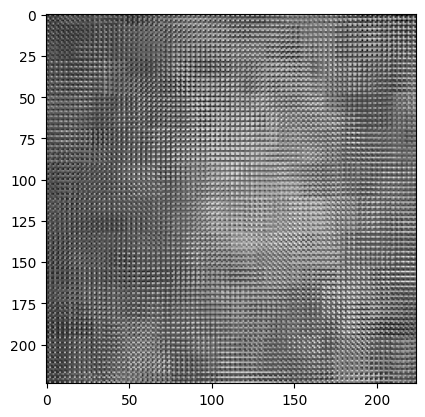

In [ ]:
image = x_t2_test[4]
print(image.shape)
image = image.reshape(3,224,224)
print(image.shape)
plt.figure()
plt.imshow(image[1], cmap = 'gray')

In [ ]:
image = x_t2_test[4]
print(image.shape)
image = image.reshape((1,) + image.shape)
print(image.shape)

(224, 224, 3)
(1, 224, 224, 3)


In [ ]:
predict = model_final.predict(image)

1/1 [==============================] - 0s 188ms/step


In [ ]:
print(predict)

[[1.1603885e-36 3.9191618e-06 1.3339454e-01 6.5595835e-02 3.7408561e-02
  6.1672631e-06]]


In [ ]:
predictions = np.array(predict)
one_hot_predictions = np.zeros_like(predictions)
one_hot_predictions[np.arange(len(predictions)), predictions.argmax(1)] = 1

print(one_hot_predictions)

[[0. 0. 1. 0. 0. 0.]]


In [ ]:
print("The predicted class for the test image 1")
print(y_t2_test[4])

The predicted class for the test image 1
2


In [ ]:
print("The predicted class for the test image 2")
print(y_t2_test[1])

The predicted class for the test image 2
1


(224, 224, 3)
(3, 224, 224)


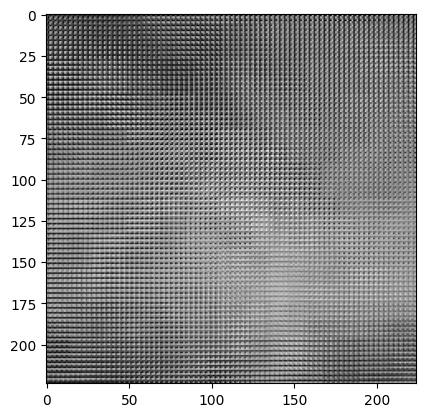

In [ ]:
image = x_t2_test[10]
print(image.shape)
image = image.reshape(3,224,224)
print(image.shape)
plt.figure()
plt.imshow(image[1], cmap = 'gray')

In [ ]:
image = x_t2_test[4]
print(image.shape)
image = image.reshape((1,) + image.shape)
print(image.shape)

(224, 224, 3)
(1, 224, 224, 3)


In [ ]:
#x_t2_test

In [ ]:
predict = model_final.predict(image)

1/1 [==============================] - 0s 88ms/step


In [ ]:
predictions = np.array(predict)
one_hot_predictions = np.zeros_like(predictions)
one_hot_predictions[np.arange(len(predictions)), predictions.argmax(1)] = 1

print(one_hot_predictions)

[[0. 0. 1. 0. 0. 0.]]


In [ ]:
y_t2_test[4]

2

In [ ]:
image

In [ ]:
from operator import index
def webapp(image):
  image = x_t2_test[10]
  image = image.reshape((1,) + image.shape)
  predict = model_final.predict(image)
  predictions = np.array(predict)
  one_hot_predictions = np.zeros_like(predictions)
  one_hot_predictions[np.arange(len(predictions)), predictions.argmax(1)] = 1
  print(one_hot_predictions)
  return one_hot_predictions

In [ ]:
app = gr.Interface(fn=webapp, title="Detection and Grading of Prostate Cancer", description ="\t                    This system aims to detect prostate cancer and detects the aggressiveness of cancer using Gleason Grade group",inputs=gr.inputs.Image(type="numpy"),
             outputs="text")

In [ ]:
app.launch(debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 19ms/step
[[0. 0. 1. 0. 0. 0.]]
1/1 [==============================] - 0s 19ms/step
[[0. 0. 1. 0. 0. 0.]]
Keyboard interruption in main thread... closing server.


In [ ]:
app.close()

Closing server running on port: 7860
